In [2]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
assert tf.__version__ >= "2.0"

import numpy as np
import os

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 퍼셉트론
- 가장 간단한 인공 신경망 구조 중 하나
- 층이 하나뿐인 TLU(threshold logic unit)으로 구성됨 (하나의 TLU를 가진 작은 네트워크를 의미하는 용도로 쓰이기도 함)
- 퍼셉트론의 활성화 함수를 sigmoid 로 변경하면 로지스틱 회귀와 동일함
- 다층 퍼셉트론(MLP)은 입력층, 하나 이상의 은닉층, 출력층으로 구성됨 -> 은닉층이 두 개 이상이면 심층 신경망(DNN)
- [wikidocs](https://wikidocs.net/24958)

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
per_clf.predict([[2, 0.5]])

array([1])

- 사이킷런의 Perceptron 클래스는 loss="perceptron", learning_rate="constant", eta0=1, penalty=None 인 SGDClassifier와 같음
- 로지스틱 회귀 분류기와 달리 클래스 확률을 제공하지 않음

In [4]:
per_clf.coef_, per_clf.intercept_

(array([[-1.4, -2.2]]), array([4.]))

그림 저장: perceptron_iris_plot


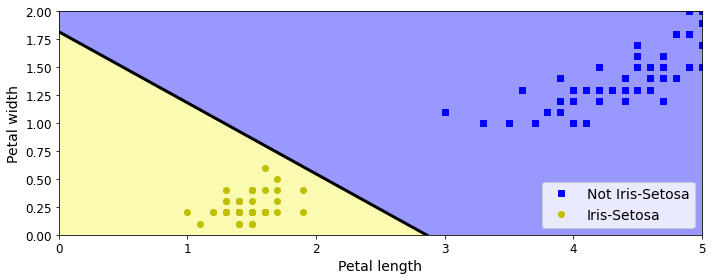

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
# print(x0)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
# print(zz)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)

from matplotlib.colors import ListedColormap
custom_map = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_map) # cmap is optional
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

## 활성화 함수


In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

그림 저장: activation_functions_plot


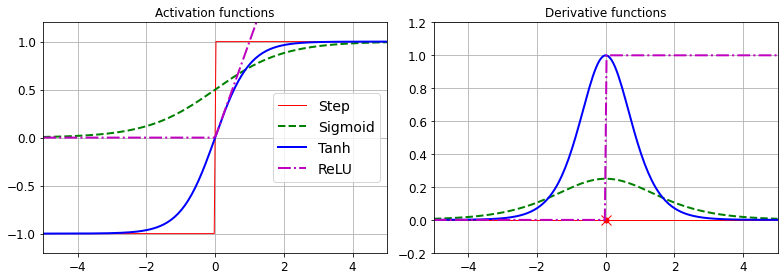

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions")
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="Relu")
plt.grid(True)
plt.title("Derivative functions")
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mpl_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

Text(0.5, 1.0, 'Activation function: sigmoid')

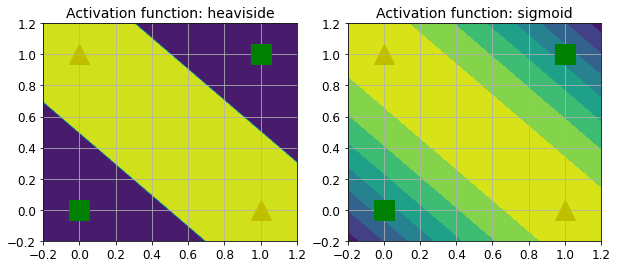

In [9]:
_x1 = np.linspace(-0.2, 1.2, 100)
_x2 = np.linspace(-0.2, 1.2, 100)

x1, x2 = np.meshgrid(_x1, _x2)
z1 = mpl_xor(x1, x2, activation=heaviside)
z2 = mpl_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.grid(True)
plt.title("Activation function: heaviside", fontsize=14)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.grid(True)
plt.title("Activation function: sigmoid", fontsize=14)

## 이미지 분류기

In [10]:
import tensorflow as tf
from tensorflow import keras

In [11]:
tf.__version__

'2.6.0'

In [12]:
keras.__version__

'2.6.0'

MINST 데이터셋 로드
- `keras.datasets`은 이미 훈련 세트와 테스트 세트로 나누어져 있음. 검증 세트는 따로 나누어야 함

In [13]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [14]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


**Scaling** -> 픽셀 강도를 255로 나누어 0 ~ 1 범위의 실수로 변경

In [15]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

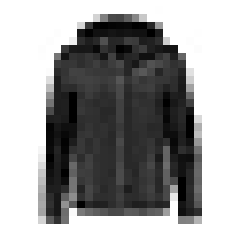

In [16]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[0]]

'Coat'

### 시퀀셜 API를 사용하여 모델 만들기

그림 저장: fashion_minst_plot


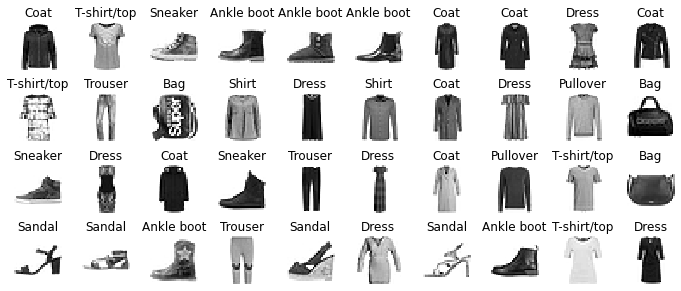

In [18]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = row * n_cols + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.title(class_names[y_train[index]], fontsize=12)
        plt.axis("off")
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_minst_plot', tight_layout=False)
plt.show()

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.layers

In [21]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [22]:
model.layers

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


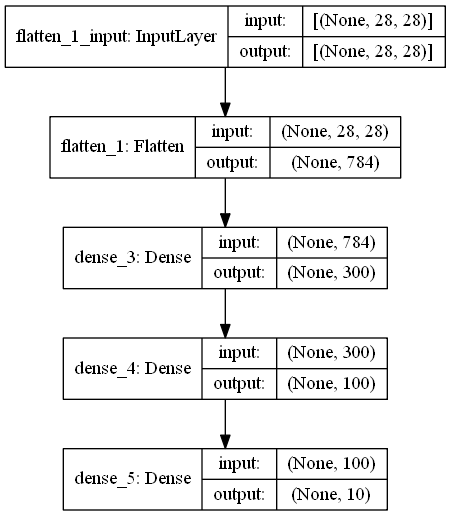

In [24]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

In [25]:
hidden1 = model.layers[1]
print(hidden1.name)
print(model.get_layer(hidden1.name))

dense_3


In [26]:
weights, bias = hidden1.get_weights()
weights, bias

(array([[ 0.04995139, -0.03047001, -0.05253023, ..., -0.01501199,
          0.03809873, -0.06272285],
        [-0.03076969, -0.03080535,  0.04827424, ...,  0.03668594,
          0.00492791,  0.02177719],
        [-0.03209381,  0.06083266, -0.04855363, ..., -0.01274475,
          0.03095413, -0.02495188],
        ...,
        [ 0.05280598,  0.06873028,  0.02256925, ..., -0.04124211,
         -0.01861595,  0.02974769],
        [-0.04391231,  0.02030656,  0.04137507, ...,  0.05598763,
          0.0660806 ,  0.00478209],
        [-0.00610714, -0.02642704,  0.04040246, ...,  0.06384277,
          0.05334607,  0.04398791]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

- `Dense` 층은 연결 가중치를 무작위로, 편향은 0으로 초기화함 
- 가중치 행렬의 크기는 입력의 크기에 달려 있음 (첫 번째 층에서 `input_shape` 매개변수 지정)
- 입력 크기를 지정하지 않으면, 모델 빌드(`build()`) 전까지 입력 크기를 기다림 -> 실제 빌드 전까지 `summary()` 메서드나 모델 저장 등 특정 작업 수행 불가)

In [27]:
weights.shape, bias.shape

((784, 300), (300,))

In [28]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", 
             metrics=["accuracy"])

'''
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
             optimizer=keras.optimizers.SGD(),
             metrics=[keras.metrics.sparse_categorical_accuracy])
'''

'\nmodel.compile(loss=keras.losses.sparse_categorical_crossentropy,\n             optimizer=keras.optimizers.SGD(),\n             metrics=[keras.metrics.sparse_categorical_accuracy])\n'

- 클래스가 배타적이므로 'sparse_categorical_crossentropy"
- 샘플마다 클래스 별 타깃 확률을 가지고 있다면 "categorical_crossentropy" (ex. 클래스 3의 경우 [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] )

In [29]:
history = model.fit(X_train, y_train, epochs=30, verbose=1,
         validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7103 - accuracy: 0.7661 - val_loss: 0.5143 - val_accuracy: 0.8298
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4904 - accuracy: 0.8299 - val_loss: 0.4398 - val_accuracy: 0.8548
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4458 - accuracy: 0.8435 - val_loss: 0.4232 - val_accuracy: 0.8562
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4182 - accuracy: 0.8530 - val_loss: 0.4117 - val_accuracy: 0.8588
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3987 - accuracy: 0.8595 - val_loss: 0.3827 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3833 - accuracy: 0.8650 - val_loss: 0.3730 - val_accuracy: 0.8738
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3689 - accuracy: 0.8697 - val_loss: 0.3791 - val_accuracy:

In [30]:
model.history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [31]:
history.params # verbose 0 : 진행과정 출력 안함, 1: Progress Bar로 출력, 2 : epoch마다 한 줄씩 

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

그림 저장: keras_learning_curve_plot


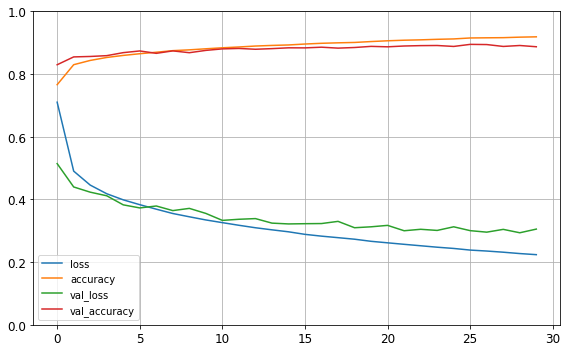

In [34]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig('keras_learning_curve_plot')
plt.show()

- about [`plt.gca()`](https://wikidocs.net/14605)
- 검증 손실은 에포크가 끝난 후에 계산되고 훈련 손실은 에포크가 진행되는 동안 계산 -> 훈련 곡선은 에포크의 절반만큼 왼쪽으로 이동해야 함

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3446 - accuracy: 0.8745


[0.34458687901496887, 0.8744999766349792]

In [36]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 0.97, 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [37]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [38]:
# y_pred = model.predict_classes(X_new)
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

[about np.argmax() axis](https://jimmy-ai.tistory.com/72)

In [39]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

그림 저장: fashion_mnist_images_plot


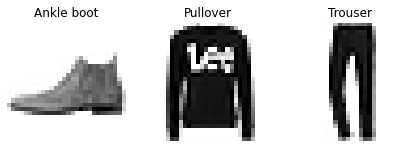

In [40]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, len(X_new), index + 1)
    plt.imshow(X_new[index], cmap='binary', interpolation='nearest')
    plt.title(class_names[y_pred[index]], fontsize=12)
    plt.axis('off')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## 회귀 MLP
캘리포니아 주택 데이터셋을 이용한 회귀 신경망

In [41]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_valid = ss.transform(X_valid)

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model_sequential = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model_sequential.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history_s = model_sequential.fit(X_train, y_train, epochs=20, 
                               validation_data=(X_valid, y_valid))
mse_test_sequential = model_sequential.evaluate(X_test, y_test)
X_new = X_test[:3]

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.6440 - val_loss: 0.8302
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7308 - val_loss: 0.6836
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6501 - val_loss: 0.6443
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6147 - val_loss: 0.6199
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5895 - val_loss: 0.5975
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5689 - val_loss: 0.5783
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5521 - val_loss: 0.5630
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5378 - val_loss: 0.5493
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5260 - val_loss: 0.5382
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5161 - val_loss: 0.5278

In [44]:
y_pred_sequential = model_sequential.predict(X_new)
y_pred_sequential

array([[0.5501543],
       [1.5467418],
       [2.836376 ]], dtype=float32)

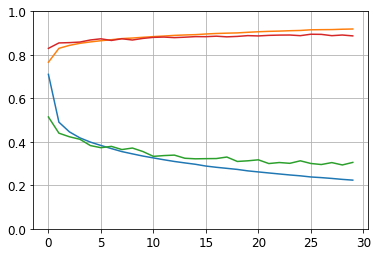

In [45]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [46]:
mse_test_sequential

0.4756573736667633

## 함수형 API

- 순차적이지 않은 신경망 (ex. Wide & Deep 신경망)


In [47]:
np.random.seed(42)
tf.random.set_seed(42)

In [48]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model_wide_deep = keras.models.Model(inputs=[input_], outputs=[output])

In [49]:
model_wide_deep.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_9 (Dense)                 (None, 30)           930         dense_8[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_9[0][0]                

In [50]:
model_wide_deep.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model_wide_deep.fit(X_train, y_train, epochs=20,
          validation_data=(X_valid, y_valid))
mse_test_wide_deep = model_wide_deep.evaluate(X_test, y_test)

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3035 - val_loss: 0.7101
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6619 - val_loss: 0.6456
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6156 - val_loss: 0.6133
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5873 - val_loss: 0.5928
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5664 - val_loss: 0.5708
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5470 - val_loss: 0.5567
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5324 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5193 - val_loss: 0.5318
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5088 - val_loss: 0.5219
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4994 - val_loss: 0.5134

In [51]:
y_pred_wide_deep = model_wide_deep.predict(X_new)
print(y_test[:3]) # X_test[:3]
print(y_pred_wide_deep)
print(mse_test_wide_deep)

[0.477   0.458   5.00001]
[[0.6082931]
 [1.7275202]
 [3.0231004]]
0.45679154992103577


- (특성 0 ~ 4) 5개의 특성은 와이드 경로, (특성 2 ~ 7) 6개의 특성은 딥 경로로 보내보자

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model_new_wd = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

[numpy indexing](https://doorbw.tistory.com/171)

In [54]:
model_new_wd.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:] # 모든 행의 index 4 요소까지, 모든 행의 index 2부터 마지막 요소까지
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

model_new_wd.fit((X_train_A, X_train_B), y_train, epochs=20,
         validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test_new_wd = model_new_wd.evaluate((X_test_A, X_test_B), y_test)
y_pred_new_wd = model_new_wd.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8248 - val_loss: 0.7923
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7055 - val_loss: 0.6450
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6258 - val_loss: 0.6057
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5910 - val_loss: 0.5840
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5690 - val_loss: 0.5665
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5508 - val_loss: 0.5542TA: 0s - loss: 0.556
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5373 - val_loss: 0.5430
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5256 - val_loss: 0.5343
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5168 - val_loss: 0.5270
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.509

### 규제를 위한 보조 출력 추가

In [55]:
np.random.seed(42)
tf.random.set_seed(42)

In [56]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model_regularization = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [57]:
model_regularization.compile(loss=["mse", "mse"], 
                             loss_weights=[0.9, 0.1],
                             optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [58]:
history_r = model_regularization.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 2.1377 - output_loss: 1.9300 - aux_output_loss: 4.0068 - val_loss: 1.0631 - val_output_loss: 0.8288 - val_aux_output_loss: 3.1725
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.9125 - output_loss: 0.7249 - aux_output_loss: 2.6008 - val_loss: 0.8148 - val_output_loss: 0.6557 - val_aux_output_loss: 2.2465
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7656 - output_loss: 0.6357 - aux_output_loss: 1.9353 - val_loss: 0.7374 - val_output_loss: 0.6142 - val_aux_output_loss: 1.8463
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7043 - output_loss: 0.5994 - aux_output_loss: 1.6482 - val_loss: 0.6974 - val_output_loss: 0.5923 - val_aux_output_loss: 1.6432
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6687 - output_loss: 0.5769 - aux_output_loss: 1.4948 - val_loss: 0.6679 - val_output_loss: 0.5734 - val_aux_

In [59]:
total_loss, main_loss, aux_loss = model_regularization.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.5287 - output_loss: 0.4825 - aux_output_loss: 0.9444


In [60]:
y_pred_r_main, y_pred_r_aux = model_regularization.predict([X_new_A, X_new_B])

In [61]:
y_pred_r_main, y_pred_r_aux

(array([[0.58027035],
        [1.8899384 ],
        [2.9110048 ]], dtype=float32),
 array([[1.1064178],
        [1.8559933],
        [2.2499   ]], dtype=float32))

In [62]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

In [63]:
y_pred_sequential, y_pred_wide_deep, y_pred_new_wd, y_pred_r_main

(array([[0.5501543],
        [1.5467418],
        [2.836376 ]], dtype=float32),
 array([[0.6082931],
        [1.7275202],
        [3.0231004]], dtype=float32),
 array([[0.5795038],
        [1.8652058],
        [3.003704 ]], dtype=float32),
 array([[0.58027035],
        [1.8899384 ],
        [2.9110048 ]], dtype=float32))

In [65]:
mse_test_sequential, mse_test_wide_deep, mse_test_new_wd, total_loss

(0.4756573736667633,
 0.45679154992103577,
 0.48459145426750183,
 0.5286951065063477)

- what is **1719, 363** in every epoch?

 => mini batch with 32 samples
 
---
각각의 model별로 mse, X_new 예측값을 비교해보고자 모두 다르게 naming 했지만, 아래부터는 하이퍼파라미터의 여러 가지 경우별로 test를 계속 해보기 때문에  계속 "model"로 이어갈 예정입니다, 

## 서브클래싱 API

- 시퀀셜 API, 함수형 API는 모두 **선언적(declarative)**임 : 모델 저장, 복사, 공유가 쉬움. 모델 구조를 출력하거나 분석하기 좋음
- 반복문, 조건문을 포함하여 여러 가지 동적인 구조를 필요로 할 땐, **명령형(imperative)** 스타일 : **서브클래싱 API**

In [77]:
class WideAndDeppModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeppModel(30, activation="relu")

[about super().__ init __ ()](https://jimmy-ai.tistory.com/79) </br>
[about super().__ init __ (**kwargs)](https://hwan-hobby.tistory.com/93)

In [78]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
         validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))

Epoch 1/10
363/363 [==============================] - 2s 2ms/step - loss: 2.2815 - output_1_loss: 2.1649 - output_2_loss: 3.3311 - val_loss: 1.1401 - val_output_1_loss: 1.0046 - val_output_2_loss: 2.3591
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.9850 - output_1_loss: 0.8598 - output_2_loss: 2.1122 - val_loss: 0.8738 - val_output_1_loss: 0.7657 - val_output_2_loss: 1.8463
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.8383 - output_1_loss: 0.7366 - output_2_loss: 1.7538 - val_loss: 0.7927 - val_output_1_loss: 0.6998 - val_output_2_loss: 1.6295
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7719 - output_1_loss: 0.6814 - output_2_loss: 1.5862 - val_loss: 0.7460 - val_output_1_loss: 0.6628 - val_output_2_loss: 1.4946
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7288 - output_1_loss: 0.6464 - output_2_loss: 1.4700 - val_loss: 0.7112 - val_output_1_loss: 0.6337 - val_ou

In [79]:
total_loss, main_loss, aux_loss

(0.6193308234214783, 0.5577545166015625, 1.1735185384750366)

In [81]:
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))
y_pred_main, y_pred_aux

(array([[0.7827476],
        [1.3723316],
        [2.592723 ]], dtype=float32),
 array([[1.425231 ],
        [1.5899377],
        [2.1175537]], dtype=float32))